Training set size: (118, 28)
         Current function value: 0.312567
         Iterations: 93
         Function evaluations: 177
         Gradient evaluations: 165


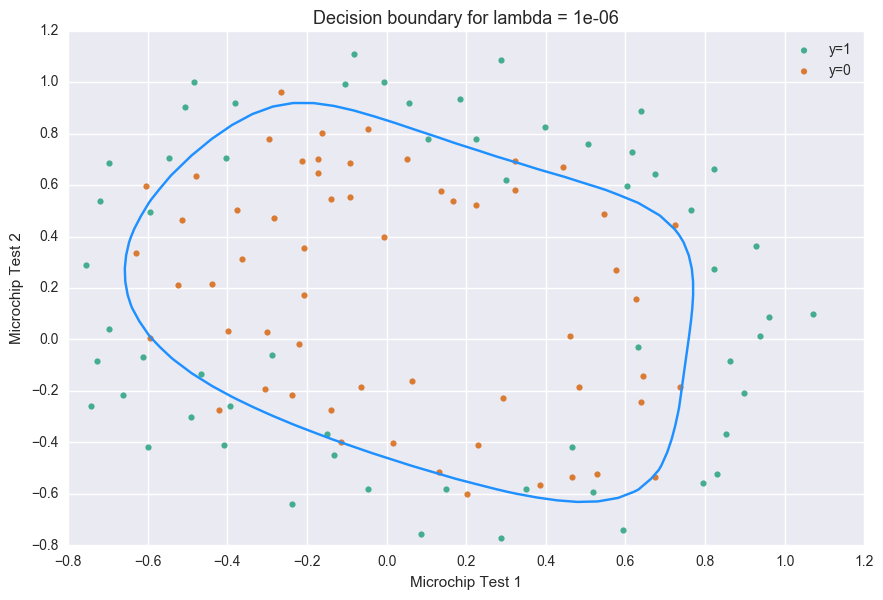

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns
%matplotlib inline

data = pd.read_csv('ex2data2.txt', header=None, names = ('x1', 'x2', 'y'))

X = data.ix[:,0:2].values
y = data.ix[:,2].values
y = y[:, None]
sns.set(style="darkgrid")

# sns.lmplot('x1', 'x2', hue='y', data=data, fit_reg=False)

def sigmoid(z):
    """
    Return Sigmoid of z
    Args:
        Z : array or scalar
    """
    return 1.0 / (1.0 + np.exp(-z))

def h_of_theta(theta, X):
    transposed_theta = theta[:, None]
    return sigmoid(X.dot(transposed_theta))

def cost_function_reg(theta, X, y, lamda):
    """
    Return cost of given theta for logistic regression
    Args:
        theta is a 1D numpy array 
        X is a m x n numpy array w/ the first column being an intercept of 1
        y is a m x 1 numpy array, it is the label set for each obs in X
        lambda : float is regularization parameter
    """
    m = len(y) * 1.0
    h_theta = h_of_theta(theta, X)


    tol = .01  
    h_theta[h_theta < tol] = tol  # values close to zero are set to tol
    h_theta[(h_theta < 1 + tol) & (h_theta > 1 - tol)] = 1 - tol  # values close to 1 get set to 1 - tol

    regularization_term = (float(lamda)/2) * theta**2
    cost_vector = y * np.log(h_theta) + (-y + 1) * np.log(-h_theta + 1)

    J = -sum(cost_vector)/m + sum(regularization_term[1:])/m

    return J[0]

def gradient(theta, X, y, lamda):
    """
    Return gradient of theta 
    Args:
        theta is a 1D numpy array 
        X is a m x n numpy array w/ the first column being an intercept of 1
        y is a m x 1 numpy array, it is the label set for each obs in X
        lambda : float is regularization parameter
    """
    m = len(y)
    h_theta = h_of_theta(theta, X)
    derivative_regularization_term = float(lamda) * theta/m
    grad = (h_theta - y).T.dot(X)/m + derivative_regularization_term.T
    grad[0][0] -= derivative_regularization_term[0]  
    
    return np.ndarray.flatten(grad)  

def new_features(X1, X2, degree=6):
    """
    Returns a m x n matrix of the original inputs along with new columns based on their exponents and combinations.
    Args:
        x1, x2: 2D arrays (floats) with identical shapes
        highest_poly_degree: int to specify the max polynomial
    """    
    num_features = int((degree + 1) * (degree + 2) / 2)
    out = np.empty(shape=(X1.shape[0], num_features), dtype=float)
    k = 0
    for i in np.arange(0, degree + 1):
        for j in np.arange(i + 1):
            new_feature_values = X1**(i - j) * X2**j
            out[:, k] = new_feature_values[:, 0]
            k += 1
    return out
    
X = new_features(X[:, 0][:, None], X[:, 1][:, None])

m, n = X.shape
initial_theta = np.zeros(n)
lambda2 = 0.000001

cost = cost_function_reg(initial_theta, X, y, lambda2)
grad = gradient(initial_theta, X, y, lambda2)

print('Training set size:',X.shape)

# set options then run fmin_bfgs to obtain optimal theta (BFGS: quasi-Newton method of Broyden, Fletcher, Goldfarb, and Shanno)

myargs = (X, y, lambda2)
opts = {'full_output': True, 'maxiter': 400}

optimal_theta, cost, grad_at_min, inv_hessian_matrix,\
fun_calls, grad_calls, warn_flags = optimize.fmin_bfgs(cost_function_reg,
                                initial_theta,
                                args=myargs,
                                fprime=gradient,
                                **opts)

# print('\nCost at theta found by fmin_bfgs:', cost)
# print('\noptimal theta:')
# print(optimal_theta)

def plot_decision_boundary(theta, X, y):
    # Simple seaborn scatterplot
    sns.lmplot('x1','x2',hue='y',data=data,fit_reg=False,size = 6,aspect= 1.5,palette='Dark2',legend=False)
    
    z = np.zeros([50, 50])
    uu = np.linspace(-1.0, 1.5, 50)
    vv = np.linspace(-1.0, 1.5, 50)
    for i, u in enumerate(uu):
        for j, v in enumerate(vv):
            z[i, j] = np.dot(new_features(np.array([[u]]), np.array([[v]])), theta)[0]
    plt.contour(uu, vv, z.T, [0], colors='dodgerblue')
    plt.axis([-.8, 1.2, -.8, 1.2])
    plt.xticks(np.arange(-.8, 1.3, .2))
    plt.yticks(np.arange(-.8, 1.3, .2))
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(('y=1', 'y=0'), loc='upper right', numpoints=1)
    plt.title('Decision boundary for lambda = ' + str(lambda2), fontsize=13)
    # plt.savefig('temp.png', transparent=True,orientation='landscape', pad_inches=0.4)


plot_decision_boundary(optimal_theta, X, y)

# print(X.shape)
plt.show()